In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
columnNames=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv('iris.data', names=columnNames)
print(dataset)
dataset.info()
dataset.describe()

     sepal-length  sepal-width  petal-length  petal-width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (to

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
print('Sample entries in dataset')
# first 5 entries
dataset.head(n=5)

Sample entries in dataset


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
classLabels = dataset['Class'].unique()
print('Classes in dataset : ', classLabels)
print('\n')
print('Class-wise Attribute Averages\n')
print(dataset.groupby(['Class']).mean())

Classes in dataset :  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Class-wise Attribute Averages

                 sepal-length  sepal-width  petal-length  petal-width
Class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


In [5]:
X = dataset.iloc[:, :4].values #Array of everython except class
Y = dataset.iloc[:, 4].values #Array of class

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, random_state=10, test_size=0.2)
print("Number of train samples: ", len(X_train))
print("Number of test samples: ", len(X_test))

Number of train samples:  120
Number of test samples:  30


In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

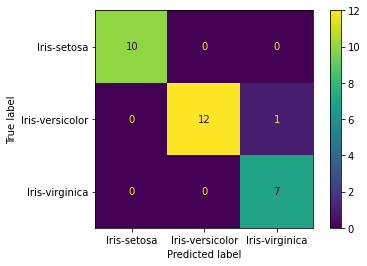

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=classLabels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classLabels)
disp.plot()

In [10]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Effect of parameter 'K'

In [13]:
def simple_line_plot(y_values, x_values, title, xtitle, ytitle):
    """Plots a lineplot for given data."""
    plt.figure(figsize=(15,5))
    plt.plot(x_values, y_values, marker='o')
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.show()

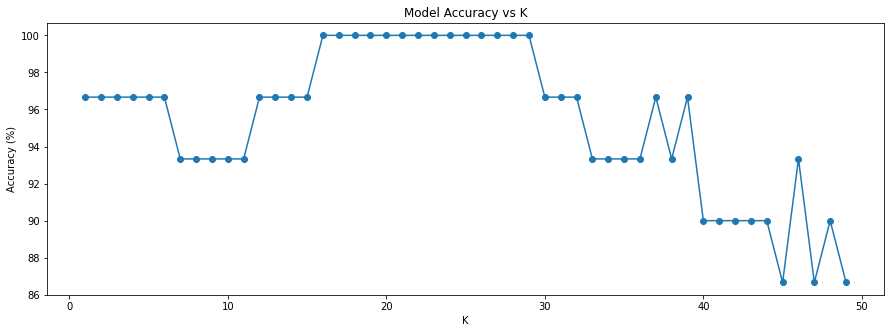

The model achieves 100% Test accuracy for K = [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [14]:
# testing out performance of the KNN algorithm for different values of K
accuracies = []

K_vals = list(range(1, 50))

for k in K_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    #print(np.mean(pred_i!=y_test))
    accuracies.append((1-np.mean(pred_i != y_test))*100)
    
simple_line_plot(accuracies, K_vals, 'Model Accuracy vs K', 
                'K', 'Accuracy (%)')

accuracies=np.array(accuracies)

print("The model achieves 100% Test accuracy for K =", list(np.where(accuracies==100)[0]))